### Importing relavent libraries


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("../Datasets/Marketing campaign dataset.csv")

In [4]:
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [5]:
print(df.dtypes)

campaign_item_id         int64
no_of_days               int64
time                    object
ext_service_id           int64
ext_service_name        object
creative_id              int64
creative_width         float64
creative_height        float64
search_tags             object
template_id            float64
landing_page            object
advertiser_id            int64
advertiser_name         object
network_id               int64
approved_budget        float64
advertiser_currency     object
channel_id               int64
channel_name            object
max_bid_cpm            float64
network_margin         float64
campaign_budget_usd    float64
impressions              int64
clicks                   int64
stats_currency          object
currency_code           object
exchange_rate            int64
media_cost_usd         float64
position_in_content    float64
unique_reach           float64
total_reach            float64
search_tag_cat          object
cmi_currency_code       object
timezone

#### Check for null values

In [6]:
print(df.isnull().sum(), len(df))

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

#### Removing 3 columns which are completely null

In [7]:
df = df.drop(columns=['total_reach','unique_reach','position_in_content','max_bid_cpm'])

#### Changing the creative columns to one column

In [8]:
df['creative_height'].unique()
df['creative_width'].unique()

array([300.,   0.,  nan])

In [9]:
df['creative_dimension'] = df['creative_height'] * df['creative_width']
df = df.drop(columns=['creative_height','creative_width'])

In [40]:
print(df.isnull().sum(), len(df))

campaign_item_id                0
no_of_days                      0
time                            0
ext_service_id                  0
ext_service_name                0
search_tags                     0
template_id                     0
landing_page                    0
advertiser_id                   0
advertiser_name                 0
network_id                      0
approved_budget               320
advertiser_currency             0
channel_id                      0
channel_name                    0
network_margin                  0
campaign_budget_usd             0
clicks                          0
stats_currency                  0
currency_code                   0
exchange_rate                   0
media_cost_usd                  0
cmi_currency_code               0
timezone                        0
weekday_cat                     0
keywords                        0
creative_dimension              0
campaign_index                  0
day_of_week                     0
month         

In [11]:
df['template_id'].unique()

array([90., 23., 92., 89., 93., nan])

##### Leaving template as it is

In [12]:
df['creative_dimension'].unique()

array([75000.,     0.,    nan])

In [13]:
df['creative_id'].unique()

array([ 1000,  1005,  1010, ..., 15595, 15600, 15605], dtype=int64)

In [14]:
df = df.drop(columns=['creative_id'])

In [15]:
# Remove rows where 'creative_dimension' is null (NaN)
df = df.dropna(subset=['creative_dimension'])

# Check the cleaned dataframe
print(df.head())

   campaign_item_id  no_of_days        time  ext_service_id ext_service_name  \
0              2733           7  2022-05-01             128     Facebook Ads   
1              2733           8  2022-05-02              16            DV360   
2              2733           9  2022-05-03             128     Facebook Ads   
3              2733          10  2022-05-04             128     Facebook Ads   
4              2733          11  2022-05-05               4       Google Ads   

                          search_tags  template_id  \
0                     #The Power of X         90.0   
1                      #Be Bold. Be X         90.0   
2  #Embrace Your Individuality with X         90.0   
3                      #Be Bold. Be X         90.0   
4                      #Be Bold. Be X         90.0   

                                        landing_page  advertiser_id  \
0  https://www.abcjewelry.com/collections/boho-je...           4756   
1  https://www.abcjewelry.com/women/costume-jewelry/

In [16]:
df.shape

(69200, 29)

<Axes: xlabel='template_id', ylabel='creative_dimension'>

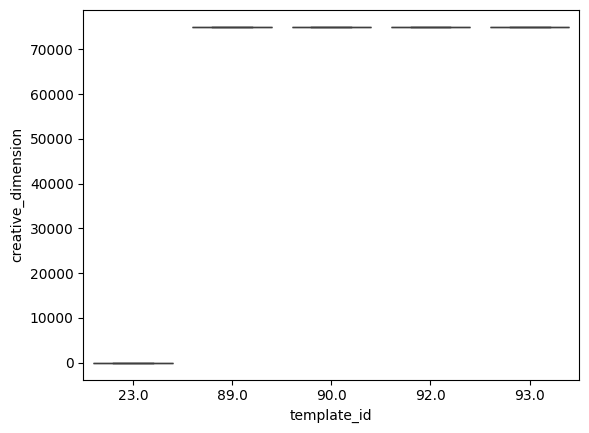

In [17]:
sns.boxplot(x=df['template_id'], y=df['creative_dimension'])

#### Campaign id

In [18]:
df['campaign_item_id'].unique()

array([2733, 2766, 2802, 2850, 2851, 2879, 3223, 3054, 3132, 3150, 3149,
       3157, 3153, 3154, 3222, 3220, 3221, 3219, 3173, 3166, 3164, 3165,
       2934, 2949, 2950, 2952, 2977, 2980, 2982, 3033, 3034, 3035, 3038,
       3039, 3040, 3041, 3050, 3042, 3052, 3053, 3055, 3056, 3045, 3046,
       3047, 3048, 3049, 3051, 3057, 3058, 3098, 3099, 3100, 3101, 3102,
       3103, 3104, 3107, 3129, 3130, 3131, 3127, 3128, 3133, 3134, 3147,
       3148, 3151, 3152, 3155, 3156, 3158, 3159, 3160, 3161, 3162, 3163,
       3167, 3168, 3169, 3170, 3171, 3172, 3174, 3175, 3176, 3177, 3178,
       3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189,
       3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3199, 3200, 3201,
       3202, 3204, 3208, 3207, 3209, 3210, 3211, 3212, 3213, 3214, 3215,
       3216, 3217, 3218, 3354, 3355, 3389, 3444, 3445, 3486, 3488, 3543,
       3545, 3546, 3547, 3557, 3558, 3559, 3719, 3959, 3960], dtype=int64)

##### Applying embedding to the campaign_id feature. if not the model might miscalculate relationship. 

In [19]:
import torch
import torch.nn as nn

# Map each unique campaign_item_id to an index starting from 0
id_mapping = {id_: idx for idx, id_ in enumerate(df['campaign_item_id'].unique())}
df['campaign_index'] = df['campaign_item_id'].map(id_mapping)

# Number of unique campaigns
num_campaigns = len(id_mapping)  # Total unique campaign IDs
embedding_dim = 16  # Dimensionality of the embedding vectors

# Create an embedding layer
campaign_embedding = nn.Embedding(num_embeddings=num_campaigns, embedding_dim=embedding_dim)

# Convert campaign_index to tensor
campaign_indices = torch.tensor(df['campaign_index'].values, dtype=torch.long)

# Get the embeddings
embedded_campaigns = campaign_embedding(campaign_indices)
print("Embedding Shape:", embedded_campaigns.shape)  # Should match (num_samples, embedding_dim)


Embedding Shape: torch.Size([69200, 16])


In [20]:
# Print the mapping dictionary
print("Campaign ID to Index Mapping:")
for campaign_id, campaign_index in id_mapping.items():
    print(f"Campaign ID: {campaign_id} -> Campaign Index: {campaign_index}")


Campaign ID to Index Mapping:
Campaign ID: 2733 -> Campaign Index: 0
Campaign ID: 2766 -> Campaign Index: 1
Campaign ID: 2802 -> Campaign Index: 2
Campaign ID: 2850 -> Campaign Index: 3
Campaign ID: 2851 -> Campaign Index: 4
Campaign ID: 2879 -> Campaign Index: 5
Campaign ID: 3223 -> Campaign Index: 6
Campaign ID: 3054 -> Campaign Index: 7
Campaign ID: 3132 -> Campaign Index: 8
Campaign ID: 3150 -> Campaign Index: 9
Campaign ID: 3149 -> Campaign Index: 10
Campaign ID: 3157 -> Campaign Index: 11
Campaign ID: 3153 -> Campaign Index: 12
Campaign ID: 3154 -> Campaign Index: 13
Campaign ID: 3222 -> Campaign Index: 14
Campaign ID: 3220 -> Campaign Index: 15
Campaign ID: 3221 -> Campaign Index: 16
Campaign ID: 3219 -> Campaign Index: 17
Campaign ID: 3173 -> Campaign Index: 18
Campaign ID: 3166 -> Campaign Index: 19
Campaign ID: 3164 -> Campaign Index: 20
Campaign ID: 3165 -> Campaign Index: 21
Campaign ID: 2934 -> Campaign Index: 22
Campaign ID: 2949 -> Campaign Index: 23
Campaign ID: 2950 ->

#### Number of days

In [21]:
days = df['no_of_days']

# Calculate the minimum and maximum values
min_days = days.min()
max_days = days.max()

print(f"Minimum days: {min_days}")
print(f"Maximum days: {max_days}")

Minimum Impressions: 0
Maximum Impressions: 118


##### Normalizing this will be a good option for GNN

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'impressions' column
df['no_of_days'] = scaler.fit_transform(df[['no_of_days']])

# Check the result
print(df[['no_of_days']].head())

   no_of_days
0    0.059322
1    0.067797
2    0.076271
3    0.084746
4    0.093220


#### Time and Week_cat


In [23]:
print(df[['time']].head())

         time
0  2022-05-01
1  2022-05-02
2  2022-05-03
3  2022-05-04
4  2022-05-05


##### Extract date components from time

In [24]:
# Convert the 'time' column to datetime format if it's not already
df['time'] = pd.to_datetime(df['time'])

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['time'].dt.dayofweek

# Extract month (1=January, 12=December)
df['month'] = df['time'].dt.month

# Extract day of the year (1-365/366)
df['day_of_year'] = df['time'].dt.dayofyear

# Display the new date-related columns
print(df[['time', 'day_of_week', 'month', 'day_of_year']].head())


        time  day_of_week  month  day_of_year
0 2022-05-01            6      5          121
1 2022-05-02            0      5          122
2 2022-05-03            1      5          123
3 2022-05-04            2      5          124
4 2022-05-05            3      5          125


##### Applying cyclic feature for better relationship

In [25]:
import numpy as np

# Apply sine and cosine transformations to cyclic features
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Display the encoded columns
print(df[['time', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos']].head())



        time  day_of_week_sin  day_of_week_cos  month_sin  month_cos
0 2022-05-01        -0.781831         0.623490        0.5  -0.866025
1 2022-05-02         0.000000         1.000000        0.5  -0.866025
2 2022-05-03         0.781831         0.623490        0.5  -0.866025
3 2022-05-04         0.974928        -0.222521        0.5  -0.866025
4 2022-05-05         0.433884        -0.900969        0.5  -0.866025


##### oneHot encoding the week_cat

In [26]:
# # Apply one-hot encoding to only 'weekday_cat' in the original DataFrame
# df = pd.get_dummies(df, columns=['weekday_cat'], drop_first=False)

# # Inspect the new columns created by get_dummies to confirm column names
# print(df.columns)

# # Now, we'll use the exact column names created by get_dummies
# df['weekend'] = df['weekday_cat_weekend'].astype(int)
# df['weekday'] = df['weekday_cat_weekday'].astype(int)

# # Drop the original columns created by get_dummies
# df = df.drop(columns=['weekday_cat_weekend', 'weekday_cat_weekday'])

# # Print the resulting DataFrame
# print(df)

#### Plateform of the advertisement

In [27]:
df['ext_service_id'].unique()
df['ext_service_name'].unique()

array(['Facebook Ads', 'DV360', 'Google Ads'], dtype=object)

##### Checking whether both are inter connected

In [28]:
# Create a combined feature by concatenating 'ext_service_id' and 'ext_service_name'
combined_feature = df[['ext_service_id', 'ext_service_name']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)

   ext_service_id ext_service_name
0             128     Facebook Ads
1              16            DV360
4               4       Google Ads


#####  We can see theres a connection between id and name. Considering dimnesionality lable encoding is applied

In [29]:
from sklearn.preprocessing import LabelEncoder

# Combine 'ext_service_id' and 'ext_service_name' into a single feature
df['ext_service_combined'] = df['ext_service_id'].astype(str) + "_" + df['ext_service_name']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the combined feature
df['ext_service_combined_label'] = label_encoder.fit_transform(df['ext_service_combined'])

# Display the first few rows of the updated DataFrame
print(df[['ext_service_combined', 'ext_service_combined_label']].head())


  ext_service_combined  ext_service_combined_label
0     128_Facebook Ads                           0
1             16_DV360                           1
2     128_Facebook Ads                           0
3     128_Facebook Ads                           0
4         4_Google Ads                           2


In [30]:
df.shape

(69200, 39)

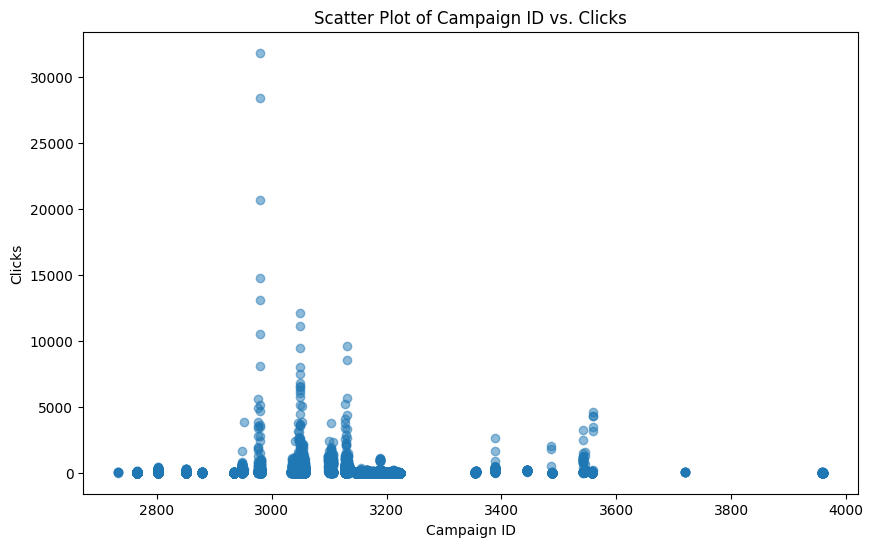

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['campaign_item_id'], df['clicks'], alpha=0.5)
plt.title('Scatter Plot of Campaign ID vs. Clicks')
plt.xlabel('Campaign ID')
plt.ylabel('Clicks')
plt.show()

In [32]:
print(df['impressions'])

0         837
1        2634
2        2135
3        2327
4        1538
         ... 
69195    1274
69196    1210
69197    1153
69198    1156
69199     590
Name: impressions, Length: 69200, dtype: int64


In [33]:
impressions = df['impressions']

# Calculate the minimum and maximum values
min_impressions = impressions.min()
max_impressions = impressions.max()

print(f"Minimum Impressions: {min_impressions}")
print(f"Maximum Impressions: {max_impressions}")

Minimum Impressions: 511
Maximum Impressions: 153959


##### Since we have larger different in the min max value. its better to normalize

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'impressions' column
df['normalized_impressions'] = scaler.fit_transform(df[['impressions']])

# Check the result
print(df[['impressions', 'normalized_impressions']].head())

   impressions  normalized_impressions
0          837                0.002124
1         2634                0.013835
2         2135                0.010583
3         2327                0.011835
4         1538                0.006693


In [35]:
df = df.drop(columns=['impressions'])

#### Search tags

In [36]:
df['search_tags'].unique()

array(['#The Power of X', '#Be Bold. Be X',
       '#Embrace Your Individuality with X',
       '#The Ultimate Fashion Statement with X',
       '#The X Factor - Fashion for the Fearless', '#Timeless X Style'],
      dtype=object)

#### Perform text embedding for search tags which is most suitable for GNN. then Applying PCA to reduce the dimensionality

In [37]:
# from sentence_transformers import SentenceTransformer
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# model = SentenceTransformer('all-MiniLM-L6-v2')  # You can choose other models if desired

# # Step 3: Generate embeddings for the 'search_tags' column
# df['search_tag_embedding'] = df['search_tags'].apply(lambda x: model.encode(x))

# # Step 4: Convert embeddings into a separate dataframe (for better inspection and use)
# embeddings_df = pd.DataFrame(df['search_tag_embedding'].tolist(), index=df.index)

# # Standardize the embeddings
# scaler = StandardScaler()
# embeddings_scaled = scaler.fit_transform(embeddings_df)

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)  # Retain 95% of variance
# embeddings_pca = pca.fit_transform(embeddings_scaled)

# # Check the explained variance ratio to confirm the retained variance
# print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_):.2f}")

# # Create a new dataframe with the reduced dimensions
# embeddings_pca_df = pd.DataFrame(embeddings_pca, columns=[f'PC{i+1}' for i in range(embeddings_pca.shape[1])])

# # Optionally, combine the reduced embeddings with the original dataframe
# df = pd.concat([df.reset_index(drop=True), embeddings_pca_df], axis=1)

# # Drop the original high-dimensional embeddings (optional)
# df = df.drop(columns=[col for col in df.columns if 'search_tag_embedding' in col], errors='ignore')

# print(df.head())

In [38]:
df['search_tag_cat'].unique()

array(['Others', 'Youtube', 'Inmarket', 'Retargeting', 'Affinity'],
      dtype=object)

##### Applying One-hot-encoding since theres no proper relationship

In [39]:
# Apply One-Hot Encoding to the 'job' column
df_encoded = pd.get_dummies(df['search_tag_cat'], prefix='search_cat')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job' column
df.drop('search_tag_cat', axis=1, inplace=True)

df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,search_tags,template_id,landing_page,advertiser_id,advertiser_name,...,month_sin,month_cos,ext_service_combined,ext_service_combined_label,normalized_impressions,search_cat_Affinity,search_cat_Inmarket,search_cat_Others,search_cat_Retargeting,search_cat_Youtube
0,2733,0.059322,2022-05-01,128,Facebook Ads,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,...,0.5,-0.866025,128_Facebook Ads,0,0.002124,0,0,1,0,0
1,2733,0.067797,2022-05-02,16,DV360,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,...,0.5,-0.866025,16_DV360,1,0.013835,0,0,1,0,0
2,2733,0.076271,2022-05-03,128,Facebook Ads,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,...,0.5,-0.866025,128_Facebook Ads,0,0.010583,0,0,1,0,0
3,2733,0.084746,2022-05-04,128,Facebook Ads,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,...,0.5,-0.866025,128_Facebook Ads,0,0.011835,0,0,1,0,0
4,2733,0.093220,2022-05-05,4,Google Ads,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,...,0.5,-0.866025,4_Google Ads,2,0.006693,0,0,1,0,0


#### Landing page

In [41]:
df['landing_page'].unique()

array(['https://www.abcjewelry.com/collections/boho-jewelry-for-women',
       'https://www.abcjewelry.com/women/costume-jewelry/',
       'https://www.abcjewelry.com/collections/rhinestone-jewelry-for-women',
       'https://www.abcjewelry.com/collections',
       'https://www.abcjewelry.com/collections/gemstone-jewelry-for-women',
       'https://www.abcjewelry.com/collections/statement-necklaces-for-women',
       'https://www.abcjewelry.com/collections/bold-jewelry-for-women',
       'https://www.abcjewelry.com/collections/hoop-earrings-for-women',
       'https://www.abcjewelry.com/collections/layered-jewelry-for-women',
       'https://www.abcjewelry.com/collections/cuff-bracelets-for-women',
       'https://www.abcjewelry.com/collections/pendant-necklaces-for-women',
       'https://www.abcjewelry.com/collections/pearl-jewelry-for-women',
       'https://www.abcjewelry.com/women/boho-jewelry/',
       'https://www.abcjewelry.com/collections/beaded-jewelry-for-women',
       'htt

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Initialize the pre-trained model (You can choose other models based on your needs)
model = SentenceTransformer('all-MiniLM-L6-v2')  # This model is fast and performs well for general tasks

# Assuming 'landing_page' is the column with URLs in your dataframe
df['landing_page_embedding'] = df['landing_page'].apply(lambda x: model.encode(x))

# Convert the embeddings into a DataFrame (each embedding is a vector)
embeddings_df = pd.DataFrame(df['landing_page_embedding'].tolist(), index=df.index)

# You can now append the embeddings to the original dataframe or keep them separately
df = pd.concat([df, embeddings_df], axis=1)

# Drop the original 'landing_page' column if it's no longer needed
# df = df.drop(columns=['landing_page'])

# Display the updated dataframe with embeddings
print(df.head())


c:\Users\Thinkpad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Check whether advertiser id and advertiser names are inter connected

In [ ]:
# Create a combined feature by concatenating 'advertiser_id' and 'advertiser_name '
combined_feature = df[['advertiser_id', 'advertiser_name ']]

# Display the unique combinations of the two features
unique_combinations = combined_feature.drop_duplicates()
print(unique_combinations)